In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set();

# Reading file

C:\Users\prade\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


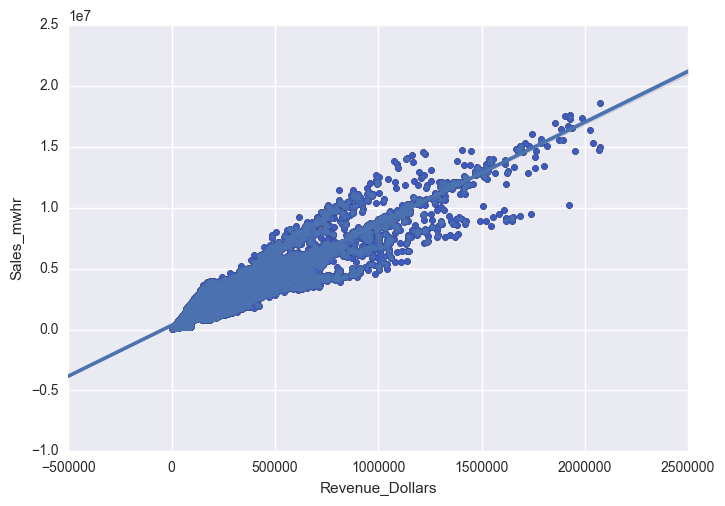

In [2]:
df= pd.read_csv("C:\\Users\\prade\\OneDrive\\Documents\\Python\\cleanedtest.csv",index_col=0, skipfooter=1)

df.head()

plt.scatter(df.Revenue_Dollars, df.Sales_mwhr)
plt.xlabel("Revenue in USD")
plt.ylabel("MWHr sold")

sns.regplot(df.Revenue_Dollars, df.Sales_mwhr)

Changing DataType of a column

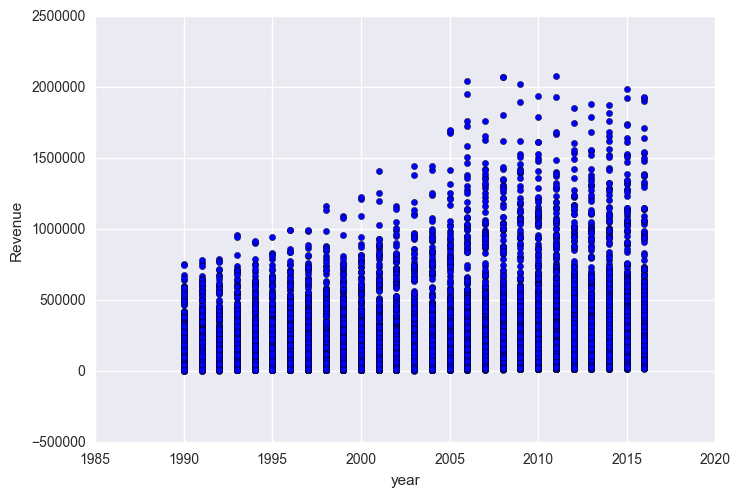

In [6]:
df['Year'] = df['Year'].apply(lambda x: int(x))
plt.scatter(df.Year,df.Revenue_Dollars)
plt.xlabel("year")
plt.ylabel("Revenue")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16422 entries, 0 to 16421
Data columns (total 9 columns):
Year                      16422 non-null int64
Month                     16422 non-null float64
State                     16422 non-null object
Data_Status               16422 non-null object
Revenue_Dollars           16422 non-null float64
Sales_mwhr                16422 non-null float64
Cents/kWh                 16422 non-null float64
log_cents_per_kilowatt    16422 non-null float64
log_Revenue_Dollars       16422 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [71]:
for column in df.columns:
    print(column)

Year
Month
State
Data_Status
Revenue_Dollars
Sales_mwhr
Cents/kWh


In [22]:
df[['State','log_Revenue_Dollars']].groupby('State').mean()

,log_Revenue_Dollars
State,
AK,9.970979
AL,12.157847
AR,11.527558
AZ,12.173820
CA,13.644683
CO,11.562695
CT,11.842399
DC,9.499242
DE,10.398796


In [19]:
df[['Year','Revenue_Dollars']].groupby('Year').sum()

,Revenue_Dollars
Year,
1990,7.237842e+07
1991,7.682798e+07
1992,7.684836e+07
1993,8.281383e+07
1994,8.455231e+07
1995,8.760959e+07
1996,9.050294e+07
1997,9.070395e+07
1998,9.336013e+07


In [6]:
features = ['Year',
            'Month',
            'Sales_mwhr',
            'log_cents_per_kilowatt',
           ]
categoricals = ['Data_Status',
               'State',
              ]
target = 'log_Revenue_Dollars'

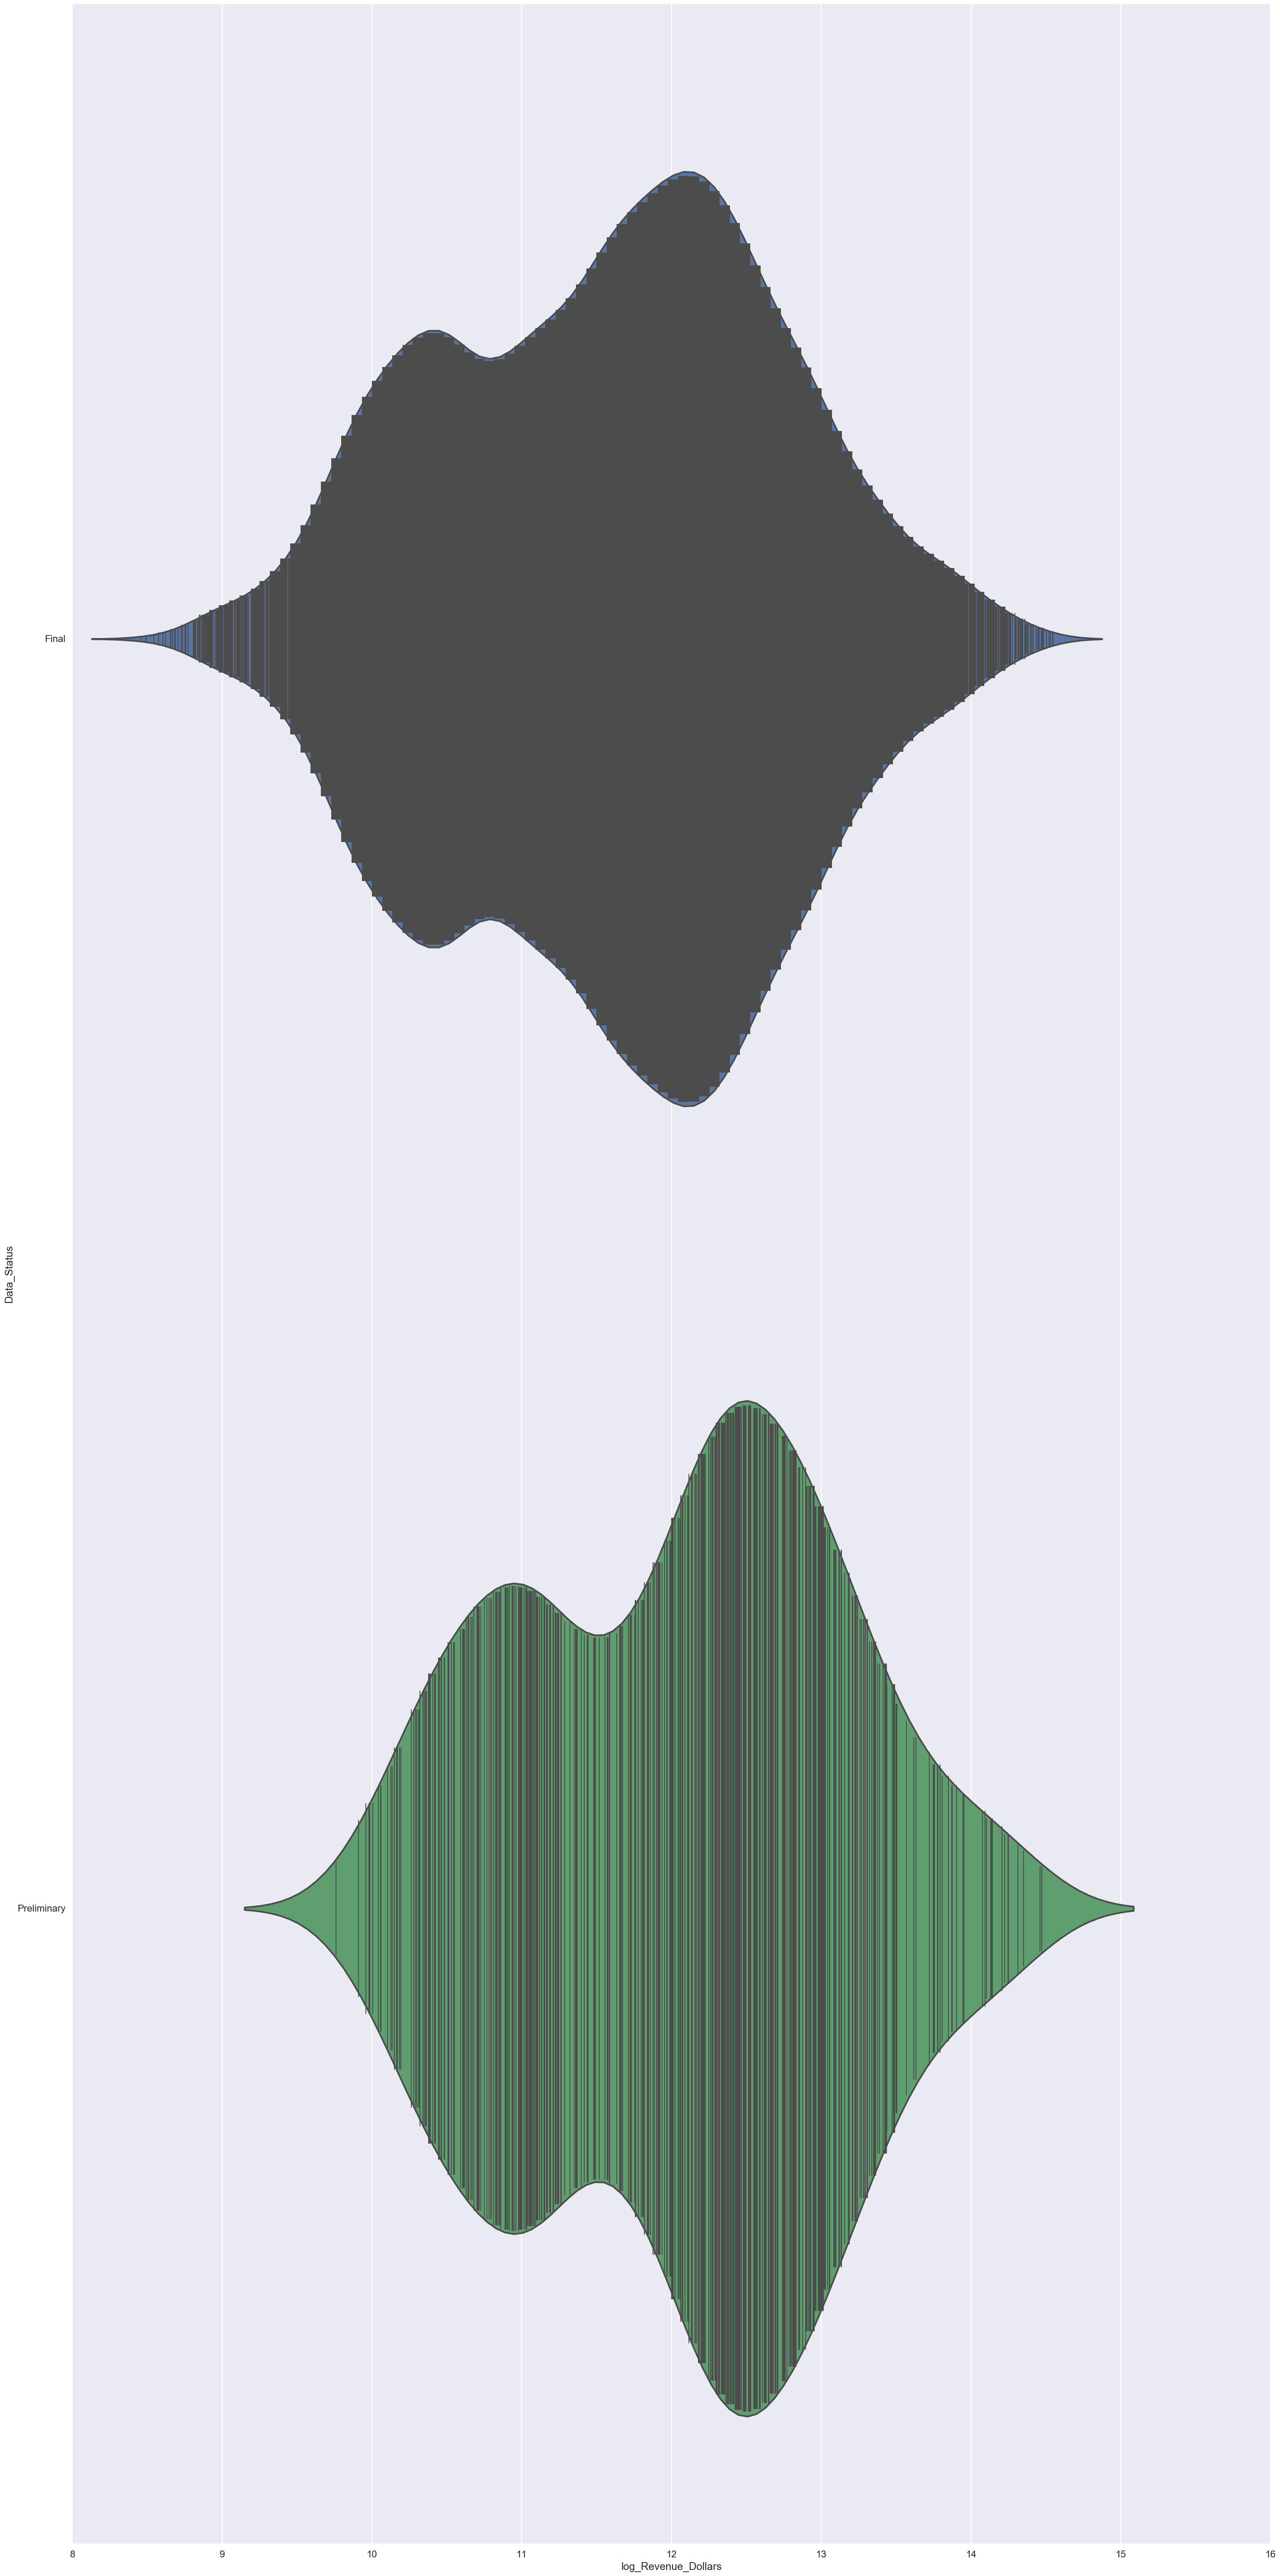

In [12]:
fig =plt.subplots(figsize=(30,60))
sns.set_context('poster')
sns.violinplot(y='Data_Status', x='log_Revenue_Dollars', data=df,
              split=True, inner="stick")
plt.tight_layout()

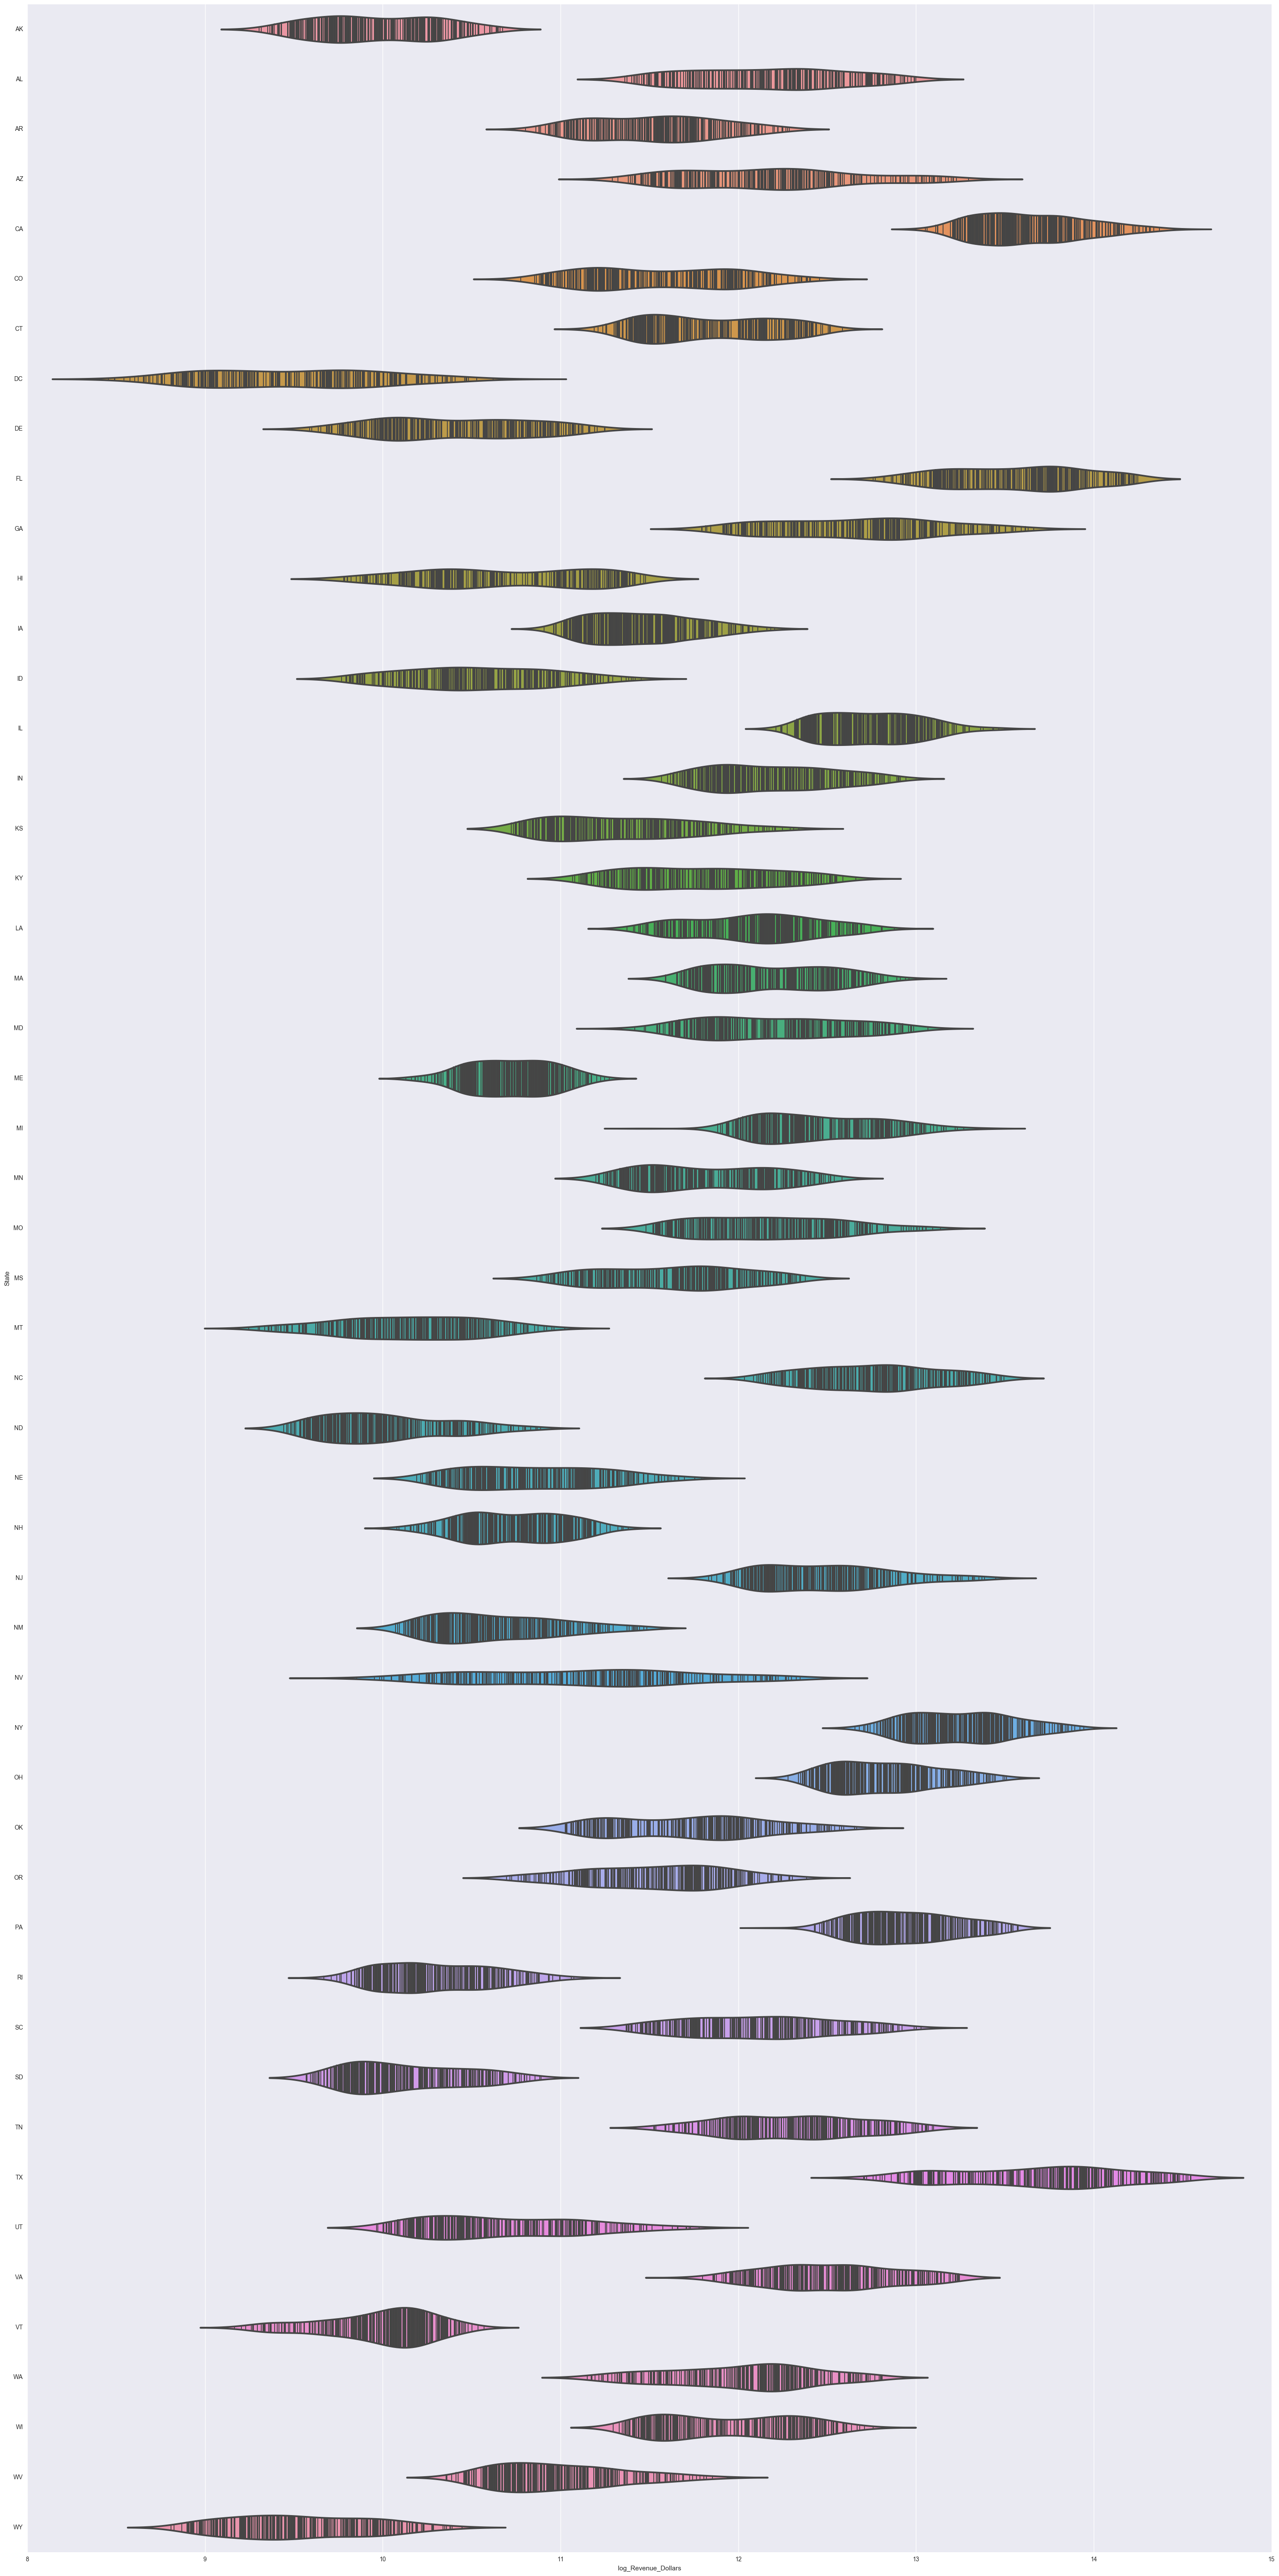

In [8]:
fig =plt.subplots(figsize=(30,60))
sns.set_context('poster')
sns.violinplot(y='State', x='log_Revenue_Dollars', data=df,
              split=True, inner="stick")
plt.tight_layout()

In [7]:
pd.get_dummies(df['State']).sample(50).head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
5920,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
pd.get_dummies(df[categoricals]).head()

,Data_Status_Final,Data_Status_Preliminary,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
dummy_categoricals=[]

In [15]:
for categorical in categoricals:
    print (categorical, len(df[categorical].unique()))
    drop_var=sorted(df[categorical].unique())[-1]
    temp_df=pd.get_dummies(df[categorical],prefix=categorical)
    df=pd.concat([df,temp_df],axis=1)
    temp_df.drop('_'.join([categorical,str(drop_var)]),axis=1,inplace=True)
    dummy_categoricals += temp_df.columns.tolist()


Data_Status 2
State 51


In [16]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [17]:
len(dummy_categoricals)

51

In [19]:
train, test = train_test_split(df,test_size=0.3)
train.head()

,Year,Month,State,Data_Status,Revenue_Dollars,Sales_mwhr,Cents/kWh,log_cents_per_kilowatt,log_Revenue_Dollars,Data_Status_Final,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
14153,2013,2.0,MT,Final,46413.91,472746.49,9.82,2.284421,10.745354,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2189,1993,7.0,WA,Final,78081.00,1760686.00,4.43,1.488400,11.265502,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12101,2009,10.0,IL,Final,352435.00,3087179.00,11.42,2.435366,12.772621,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11533,2008,11.0,DC,Final,16303.00,125379.00,13.00,2.564949,9.699104,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6840,2001,3.0,CT,Final,111727.00,1054435.00,10.60,2.360854,11.623814,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
rf =RandomForestRegressor(n_estimators=100, oob_score=True)
rf.fit(train[features + dummy_categoricals], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

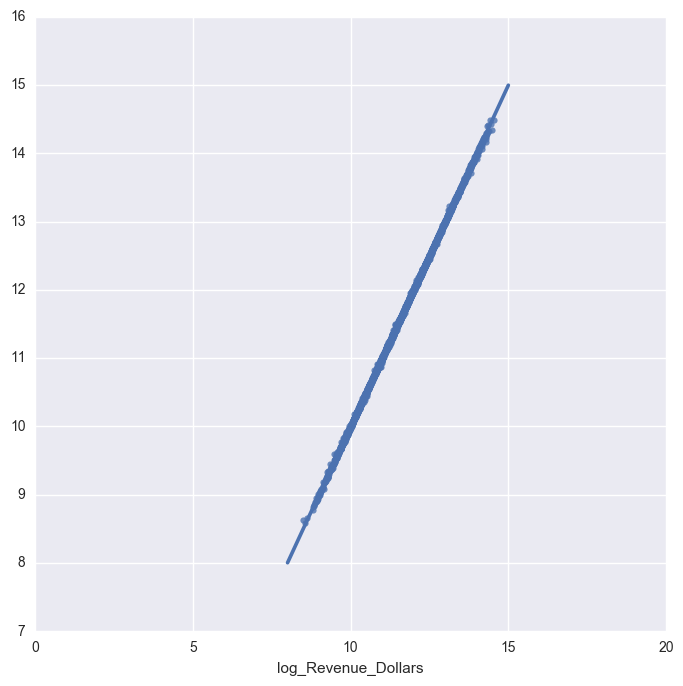

In [32]:
fig =plt.subplots(figsize =(7,7))
sns.regplot(test[target],rf.predict(test[features +dummy_categoricals]))
plt.xlim(0,20)
plt.tight_layout()

In [23]:
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error


In [24]:
predicted = rf.predict(test[features +dummy_categoricals])
r2_score(test[target], predicted)

0.99987563524053735

In [26]:
explained_variance_score(test[target], predicted)

0.99987564800921136

In [27]:
mean_squared_error(test[target], predicted)

0.00016215165355856038

In [31]:
rf_importances = pd.DataFrame({'name':train[features+dummy_categoricals].columns,
                             'importance':rf.feature_importances_}).sort_values(by='importance',
                                                                             ascending=False).reset_index(drop=True)
rf_importances.head(20)

,importance,name
0,0.927517,Sales_mwhr
1,0.071681,log_cents_per_kilowatt
2,0.000662,Year
3,0.000053,Month
4,0.000025,State_HI
5,0.000007,State_OR
6,0.000004,State_PA
7,0.000003,State_SD
8,0.000003,State_MT
9,0.000002,State_RI
